# BUSINESS CASE: To classify a given image of a handwrittendigit into one of the 10 classes representing integer values from 0 to 9 

### Abstract: 
The handwritten digit dataset is a popular collection of images consisting of 10 classes, each representing a different numerical digit. The dataset contains a total of 60,000 training images and 10,000 test images, all of which have been preprocessed and formatted to be compatible with machine learning algorithms. The images are grayscale and have a resolution of 28x28 pixels.

## Python implementation using CNN model:

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset



from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

##### 1. Rescaling the images:

In [3]:
#since images are gray-scale images they have pixels from 0 to 255

# Changing the shape of array to 4-D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)



#Scaling the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
# get the shape of one of the gray-scale images
image_shape = x_train[0].shape
print(image_shape) # prints (100, 200)

y_train

(28, 28, 1)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
import keras
from keras.utils import np_utils

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Spliting the training data into validation data and training data
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [6]:
#printing the shape of training and testing data

print('Size of x_train samples: ',x_train.shape)
print('Size of y_train samples: ',y_train.shape) 
print('Size of x_test samples: ',x_test.shape)
print('Size of y_test samples: ',y_test.shape)
print('Validation samples: ',x_valid.shape)

Size of x_train samples:  (55000, 28, 28, 1)
Size of y_train samples:  (55000, 10)
Size of x_test samples:  (10000, 28, 28, 1)
Size of y_test samples:  (10000, 10)
Validation samples:  (5000, 28, 28, 1)


##### 3. Defining the model architecture:

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model=Sequential()

#First covolutional layer
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2)) 

#second convolutional layer
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))  

model.add(Dropout(0.3))   
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

##### 4. Compiling the model:

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



##### 5. Training the model:

In [11]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)



######  6. Fitting the model onto dataset:

In [12]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_valid,y_valid), callbacks=[checkpointer], 
          verbose=3, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.07979, saving model to model.weights.best.hdf5
Epoch 2/10

Epoch 2: val_loss improved from 0.07979 to 0.06163, saving model to model.weights.best.hdf5
Epoch 3/10

Epoch 3: val_loss improved from 0.06163 to 0.05035, saving model to model.weights.best.hdf5
Epoch 4/10

Epoch 4: val_loss improved from 0.05035 to 0.04140, saving model to model.weights.best.hdf5
Epoch 5/10

Epoch 5: val_loss improved from 0.04140 to 0.03911, saving model to model.weights.best.hdf5
Epoch 6/10

Epoch 6: val_loss did not improve from 0.03911
Epoch 7/10

Epoch 7: val_loss improved from 0.03911 to 0.03407, saving model to model.weights.best.hdf5
Epoch 8/10

Epoch 8: val_loss did not improve from 0.03407
Epoch 9/10

Epoch 9: val_loss did not improve from 0.03407
Epoch 10/10

Epoch 10: val_loss improved from 0.03407 to 0.03285, saving model to model.weights.best.hdf5


##### 7.Load the model with best validation accuracy:

In [13]:
model.load_weights('model.weights.best.hdf5')

##### 8. Evaluating the model:

In [14]:
# Model Evaluation
print("Evaluate on test data")
(loss,accuracy)= model.evaluate(x_test, y_test)
print('Loss: ',loss)
print('Accuracy: ',accuracy)

Evaluate on test data
313/313 [==============================] - 14s 45ms/step - loss: 0.0315 - accuracy: 0.9897
Loss:  0.031476084142923355
Accuracy:  0.9897000193595886


##### 9. Visualizing few predictions:

In [15]:
# get predictions on the test set
y_predict = model.predict(x_test)

# define text labels 
mnist_labels = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 15s 44ms/step


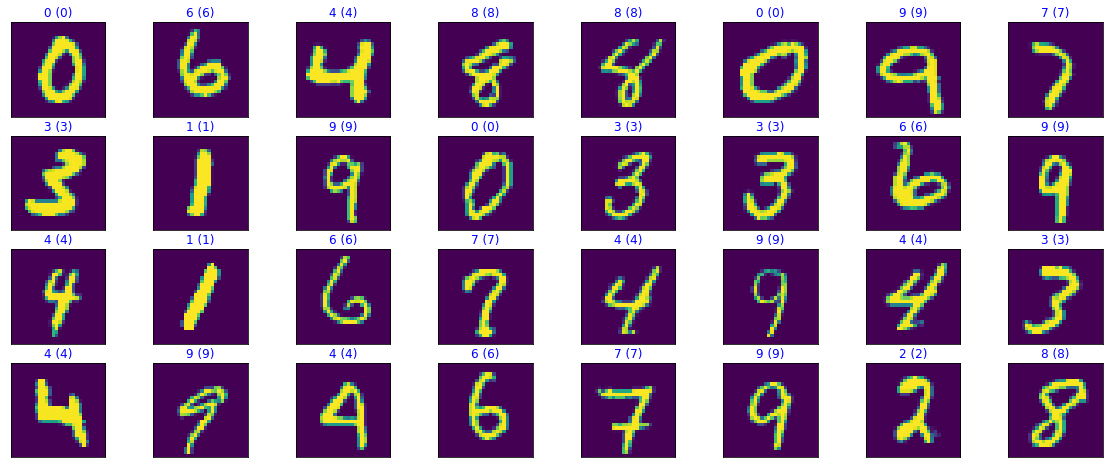

In [16]:
#plot for predicted data

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_predict[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

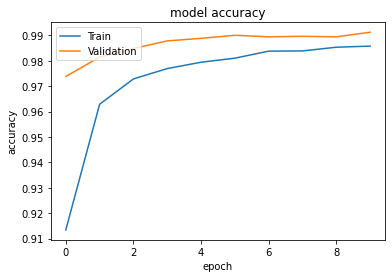

In [17]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##### Insights:

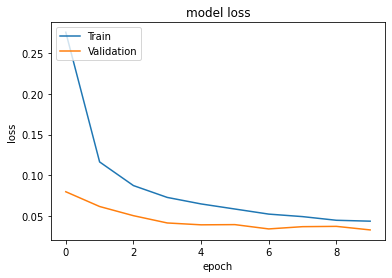

In [18]:
# summarize history for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##### Insights:

#### The model has an accuracy score of 0.9897.

## Python implementation using ANN model:

In [19]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [20]:
#load the dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

##### 1. Rescaling the images:

In [21]:
#To work with RGB color images in a MLP Classifier, you need to flatten each image into a 1-dimensional vector, where each pixel of the image is a feature. 
x_train = np.array([image.flatten() for image in x_train])
x_test = np.array([image.flatten() for image in x_test])

#Scaling the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [22]:
#printing the size of training and testing data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


##### 2. Creation of Artificial Neural Network(ANN) model:

In [23]:
from sklearn.neural_network import MLPClassifier


model=MLPClassifier(learning_rate_init=0.05,hidden_layer_sizes=(100,),max_iter=100,random_state=3)

##### 3. Fitting the model onto the training data:

In [24]:
model.fit(x_train,y_train)

MLPClassifier(learning_rate_init=0.05, max_iter=100, random_state=3)

##### 4. Evaluating the model:

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
#predicting the values based on testing data
predicted_y=model.predict(x_test)


In [27]:
# Calculation of accuracy of the model
print('Accuracy of the model: ',accuracy_score(y_test,predicted_y))

Accuracy of the model:  0.9407


In [28]:
cm1=confusion_matrix(y_test,predicted_y)

##### 5. Hyperparameter tuning:

In [29]:
params=[
    {
        'hidden_layer_sizes':(10,100),
        'activation':['relu'],
        'alpha':[0.1],
        'batch_size':['auto'] ,
        'learning_rate':['constant'] ,
        'learning_rate_init':[0.001] ,
        'max_iter':[200] ,
        'random_state':[3],
          
    }   
    
]

In [30]:
from sklearn.model_selection import RandomizedSearchCV

ann_model=MLPClassifier(random_state=3)

In [31]:
ann_cv=RandomizedSearchCV(ann_model,param_distributions=params,cv=3,n_jobs=-1 )
                     

In [32]:
ann_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=3), n_jobs=-1,
                   param_distributions=[{'activation': ['relu'], 'alpha': [0.1],
                                         'batch_size': ['auto'],
                                         'hidden_layer_sizes': (10, 100),
                                         'learning_rate': ['constant'],
                                         'learning_rate_init': [0.001],
                                         'max_iter': [200],
                                         'random_state': [3]}])

In [33]:
#get the best score and parameters and printing them after the execution of hyperparameter tuning

Best_score= ann_cv.best_score_
print(f"Best Score: {Best_score})")
Best_params = ann_cv.best_params_
print(f"Best Paramters: {Best_params})")

Best Score: 0.9743499999999999)
Best Paramters: {'random_state': 3, 'max_iter': 200, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': 100, 'batch_size': 'auto', 'alpha': 0.1, 'activation': 'relu'})


In [34]:
ann_model_best=MLPClassifier(random_state= 3, max_iter= 200, learning_rate_init= 0.001, 
                  learning_rate= 'constant', hidden_layer_sizes= 100, batch_size= 'auto', 
                  alpha= 0.1, activation= 'relu')

In [35]:
ann_model_best.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=100, random_state=3)

In [36]:
predicted_y_best=ann_model_best.predict(x_test)

In [37]:
print(accuracy_score(y_test,predicted_y_best))

0.98


In [38]:
cm2=confusion_matrix(y_test,predicted_y_best)

In [39]:
print(classification_report(y_test,predicted_y_best))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



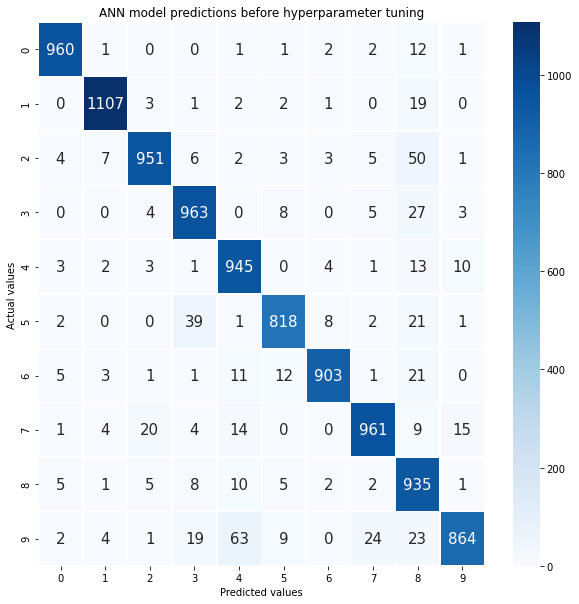

In [40]:
# plotting confusion matrix

from sklearn.metrics import confusion_matrix

fig=plt.figure(figsize=(10,10))
ax1=plt.subplot()
ax1.set_title('ANN model predictions before hyperparameter tuning')
sns.heatmap(cm1,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()



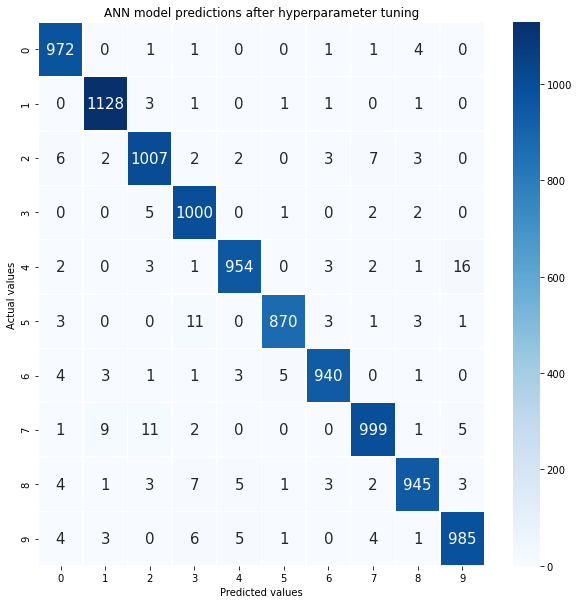

In [42]:
fig=plt.figure(figsize=(10,10))
ax1=plt.subplot()
ax1.set_title('ANN model predictions after hyperparameter tuning')
sns.heatmap(cm2,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()



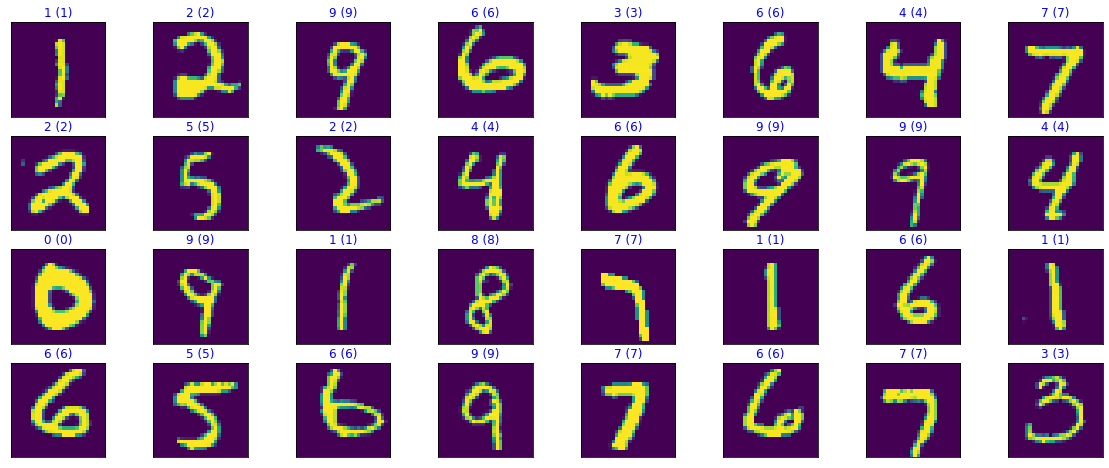

In [43]:
mnist_labels=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx].reshape(28,28))           
    pred_idx = predicted_y_best[idx]
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                  color=("blue" if pred_idx == true_idx else "red"))

#### The accuracy of the model has increased from 0.9407 to 0.98 after the hyperparameter tuning.

## Python implementation using KNN model:

In [44]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [45]:
#load the dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

##### 1. Rescaling the images:

In [46]:
#since images are gray-scale images they have pixels from 0 to 255

# Changing the shape of array to 4-D
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)



#Scaling the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [47]:
# get the shape of one of the gray-scale images
image_shape = x_train[0].shape
print(image_shape) # prints (100, 200)

y_train

(784,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
#printing the shape of training and testing data

print('Size of x_train samples: ',x_train.shape)
print('Size of y_train samples: ',y_train.shape) 
print('Size of x_test samples: ',x_test.shape)
print('Size of y_test samples: ',y_test.shape)


Size of x_train samples:  (60000, 784)
Size of y_train samples:  (60000,)
Size of x_test samples:  (10000, 784)
Size of y_test samples:  (10000,)


##### 2: Visualizing the input images:

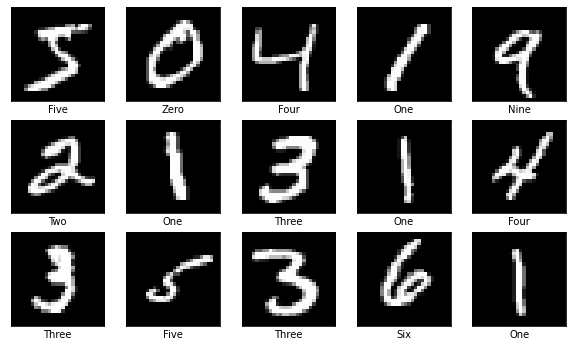

In [59]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])   
    img = x_train[i].reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

##### 3. Finding the optimal value of k for K-Nearest Neighbors(KNN) model:

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

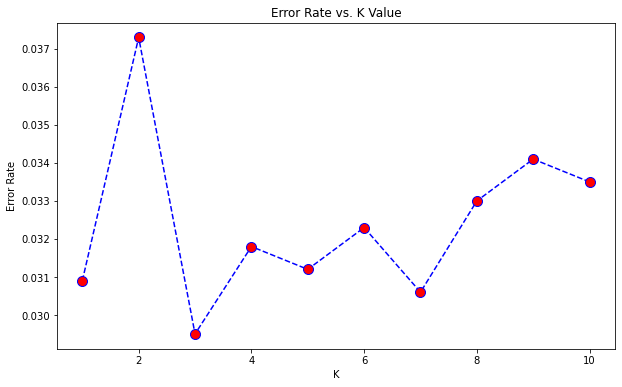

In [51]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### 4. Fitting the model onto the dataset with k=3:

In [52]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##### 5. Evaluating the model: 

In [53]:
knn_prediction=knn.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
print(accuracy_score(y_test,knn_prediction))

0.9705


In [57]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##### 6. Visualizing few predictions:

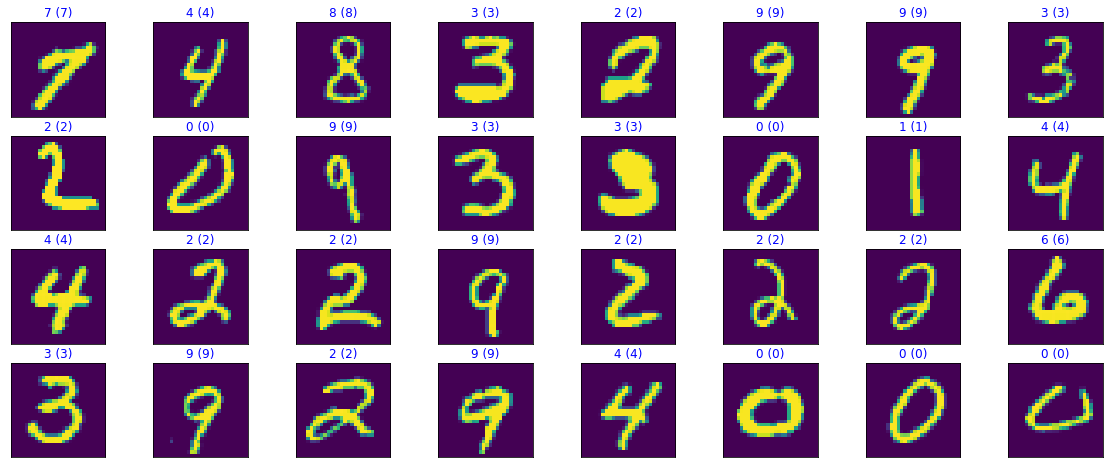

In [63]:
mnist_labels=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx].reshape(28,28))           
    pred_idx = knn_prediction[idx]
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                  color=("blue" if pred_idx == true_idx else "red"))

#### The accuracy of the model  obtained through KNN model is 0.9705.

### Note: Since the hyperparameter tuning slows the model and takes longer time to execute the model, will be skipping the tuning part.

## Python implementation using SVM model:

In [64]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [65]:
#load the dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

##### 1. Rescaling the images:

In [66]:
#since images are gray-scale images they have pixels from 0 to 255

# Changing the shape of array to 4-D
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)


#Scaling the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [67]:
#printing the size of training and testing data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


##### 2. Visualising input images:

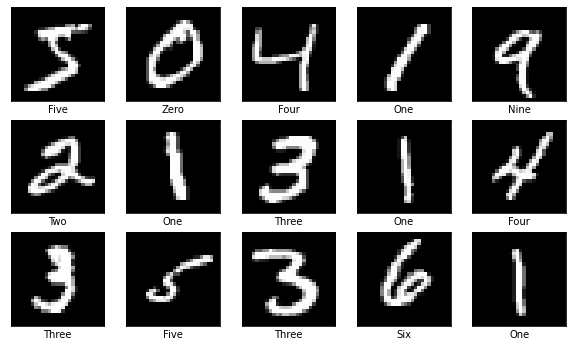

In [68]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])   
    img = x_train[i].reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

##### 3. Creation of Support Vector Machine(SVM) model:

In [69]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=1.0,gamma='scale')

##### 4. Fitting the model onto the dataset:

In [70]:
svm.fit(x_train,y_train)

SVC()

##### 5. Evaluating the model:

In [71]:
svm_prediction=svm.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score,classification_report

In [74]:
print(accuracy_score(y_test,svm_prediction))

0.9792


In [75]:
print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### 6. Visualising few predictions:

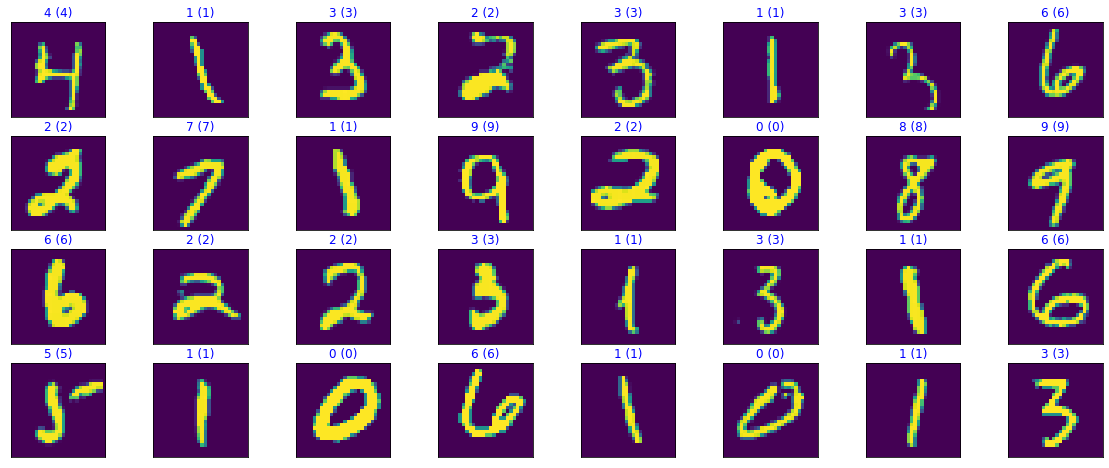

In [76]:
mnist_labels=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx].reshape(28,28))           
    pred_idx = svm_prediction[idx]
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                  color=("blue" if pred_idx == true_idx else "red"))

#### The accuracy of the model  obtained through SVM model is 0.9792.

### Note: Since the hyperparameter tuning slows the model and takes longer time to execute the model, will be skipping the tuning part.

## Comparison report:

In [90]:
from tabulate import tabulate


table_data=[['MODEL','ACCURACY SCORE'],
           ['Covolutional Neural Network','0.9897'],
           ['Artificial Neural Network','0.98'],
           ['K-Nearest Neighbors','0.9705'] ,
           ['Support Vector Machine','0.9792']]

In [91]:
print(tabulate(table_data,headers='firstrow',tablefmt='fancy_grid',maxcolwidths=[None, 8]))

╒═════════════════════════════╤══════════════════╕
│ MODEL                       │   ACCURACY SCORE │
╞═════════════════════════════╪══════════════════╡
│ Covolutional Neural Network │           0.9897 │
├─────────────────────────────┼──────────────────┤
│ Artificial Neural Network   │           0.98   │
├─────────────────────────────┼──────────────────┤
│ K-Nearest Neighbors         │           0.9705 │
├─────────────────────────────┼──────────────────┤
│ Support Vector Machine      │           0.9792 │
╘═════════════════════════════╧══════════════════╛


### In comparison with all the four models, best accuracy score is obtained with Convolutional Neural Network and works the best for the handwriiten digit recognition of MNIST dataset.